In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 3

In [3]:
# Define the function
def rhs_ivp(x, y, ep, gamma):
    f1 = y[1]
    f2 = ((gamma*np.abs(y[0])**2)+x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [4]:
# Define some constants 
K = 1
L = 3
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = [0.05, -0.05]

In [5]:
A15_18 = np.array([])
Eigenfunctions_all = np.array([])

for gamma in gamma:
    A = 0.000001
    ep_start = 0
    ep = ep_start
    dep = K/100 
    y0 = np.array([A,(((K*L**2) - ep)**.5)*(A)])

    for modes in range(2):
        ep = ep_start
        dep = K/100

        for j in range(1000): # using for loop to make sure it stops. 
            # update initial condition
            y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

            # solve ODE 
            sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
            y_sol = sol.y[0,:] # f1 
            y_sol_dx = sol.y[1,:] #f2

            # define/compute norm and boundary conditions 
            norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
            norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
            boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) # same bc as problem 1 and 2. 
    #         boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])

    # Norm Shooting 

            #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
            if boundary < tol and norm_tol < tol:
                break
            else:
                A = A/np.sqrt(norm)
    #             print('norm:', norm)
    #             print('A:', A)

    # BC Shooting

            # update initial condition with new A 
            y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

            # solve ODE 
            sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
            y_sol = sol.y[0,:] # f1 
            y_sol_dx = sol.y[1,:] #f2 

            # define/compute norm and boundary conditions 
            norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
            norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
            boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1])

            if boundary < tol and norm_tol < tol:
                break

            if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
                ep = ep + dep # Increase 
            else:
                ep = ep - dep/2 # Decrease 
                dep = dep/2 # Cut dep in half to make sure we converge

        ep_start = ep + 0.1 
        A = A

        A15_18 = np.append(A15_18, ep)
        Eigenfunctions_all = np.append(Eigenfunctions_all, y_sol)

In [6]:
A15 = A15_18[0:2].reshape(1,2)
A18 = A15_18[2:4].reshape(1,2)

print('eigenvalues for gamma = 0.05', A15)
print('eigenvalues for gamma = -0.05', A18)

eigenvalues for gamma = 0.05 [[1.01945129 3.01267334]]
eigenvalues for gamma = -0.05 [[0.97994629 2.98324341]]


In [7]:
A13 = Eigenfunctions_all[0:61]

In [8]:
A14 = Eigenfunctions_all[61:122]

In [9]:
A16 = Eigenfunctions_all[122:183]

In [10]:
A17 = Eigenfunctions_all[183:244]

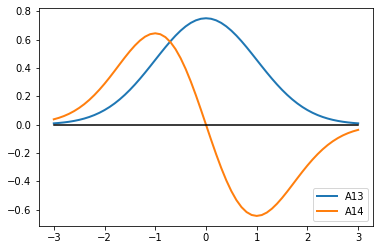

In [11]:
# 0.05
plt.plot(sol.t, A13, linewidth=2, label = 'A13')
plt.plot(sol.t, A14, linewidth=2, label = 'A14')
plt.plot(sol.t, 0*sol.t, 'k')
plt.legend(loc="lower right")

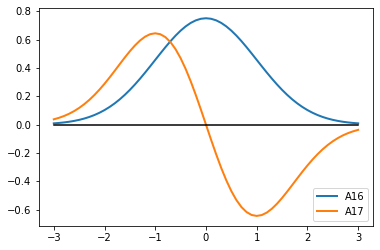

In [12]:
# -0.05
plt.plot(sol.t, A13, linewidth=2, label = 'A16')
plt.plot(sol.t, A14, linewidth=2, label = 'A17')
plt.plot(sol.t, 0*sol.t, 'k')
plt.legend(loc="lower right")